## NOTEBOOK 07

In this notebook we will continue what we have done il lesson 4 by simulating a Lennard-Jones fluid. This time we will use a Monte Carlo method in order to simulate a canonical ensamble instead of a microcanonical one.

Moreover, we will calculate new interesting thermodynamic and statistical properties of the system, such as the pressure and the radial distribution function. We will also integrate the calculations of these quantities into the previous molecular simulation code, in order to make a comparison between the two methods.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import optimize

### EXERCISE 07.1

The first thing we have to calculate is how large the blocks should be. 

To do this we generate $5*10^4$ samples *after* the system has been equilibrated and then use them to calculate autocorrelation functions and block size.

Here below there's an example of this samples for the solid state



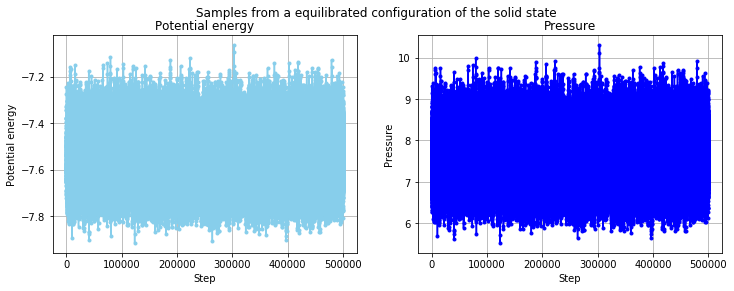

In [5]:
solid_pot=np.loadtxt("instantaneous_values/solid_epot.dat")
solid_pres=np.loadtxt("instantaneous_values/solid_pres.dat")


x=[]
for j in range(len(solid_pot)):
    x.append(j)
    
fig, axs=plt.subplots(1,2, figsize=(12,4))

fig.suptitle("Samples from a equilibrated configuration of the solid state")

axs[0].plot(x,solid_pot,marker='.',color='skyblue')
axs[0].set_title('Potential energy')
axs[0].set(xlabel='Step', ylabel='Potential energy')
axs[0].grid(True)

axs[1].plot(x,solid_pres,marker='.',color='blue')
axs[1].set_title('Pressure')
axs[1].set(xlabel='Step', ylabel='Pressure')
axs[1].grid(True)

plt.show()
plt.close()


- **Autocorrelation functions**

In order to do so, we calculate the autocorrelation functions for the quantities $U/N$ and $P$ in different thermodynamics conditions.

We first save on a file $5x10^{5}$ instantaneous values of potential energy per particle and pressure, then we use that data in order to calculate the autocorrelation functions.

In [7]:
#Define a function for autocorrelation

def chi(v,t):
    t_max=len(v)
    #Useful quantities for denominator
    ave=np.mean(v)
    av2=np.mean(np.power(v,2))
    # Calculate numerator
    av_ret =np.add.reduce(v[:t_max-t])
    av_ret /= (t_max-t)
    av_adv=np.add.reduce(v[t:])
    av_adv /= (t_max-t)
    
    corr=0
    for i in range(t_max-t):
        corr+=v[i]*v[i+t]
    corr /= (t_max-t)
    
    ac=(corr-av_ret*av_adv)/(av2-ave**2)
    
    return ac

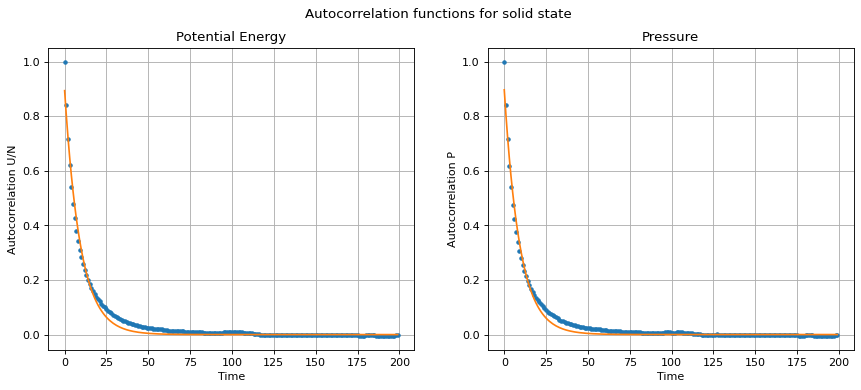

Estimated correlation time for potential energy = 9.445166525938863
Estimated correlation time for pressure = 9.254383615060492


In [16]:
# Autocorrelation for solid
solid_pot=np.loadtxt("instantaneous_values/solid_epot.dat")
solid_pres=np.loadtxt("instantaneous_values/solid_pres.dat")

#Calculate autocorrelation, it is sufficient less than the full vector

times=np.asarray(range(200))

ac_pot=np.zeros(len(times))
ac_pres=np.zeros(len(times))

for j in range(len(times)):
    ac_pot[j]=chi(solid_pot,j)
    ac_pres[j]=chi(solid_pres,j)
    

# Try to fit the exponential decrease

def exp_fit(x,a,b):
    return a*(np.exp(-x))**b
    
params_pot, cov_pot= optimize.curve_fit(exp_fit, times, ac_pot)  
params_pres, cov_pres= optimize.curve_fit(exp_fit, times, ac_pres)

# Now plot the data

fig,(ax1,ax2)= plt.subplots(1,2,figsize=(13,5), dpi=80)

fig.suptitle("Autocorrelation functions for solid state")
ax1.plot(times,ac_pot,marker=".",linestyle="none")
ax1.plot(times,exp_fit(times,params_pot[0],params_pot[1]))
ax1.set_title('Potential Energy')
ax1.set(xlabel='Time', ylabel='Autocorrelation U/N')
ax1.grid(True)

ax2.plot(times,ac_pres,marker=".",linestyle="none")
ax2.plot(times,exp_fit(times,params_pres[0],params_pres[1]))
ax2.set_title('Pressure')
ax2.set(xlabel='Time', ylabel='Autocorrelation P')
ax2.grid(True)

plt.show()
plt.close()

print("Estimated correlation time for potential energy = "+str(1/params_pot[1]))
print("Estimated correlation time for pressure = "+str(1/params_pres[1]))

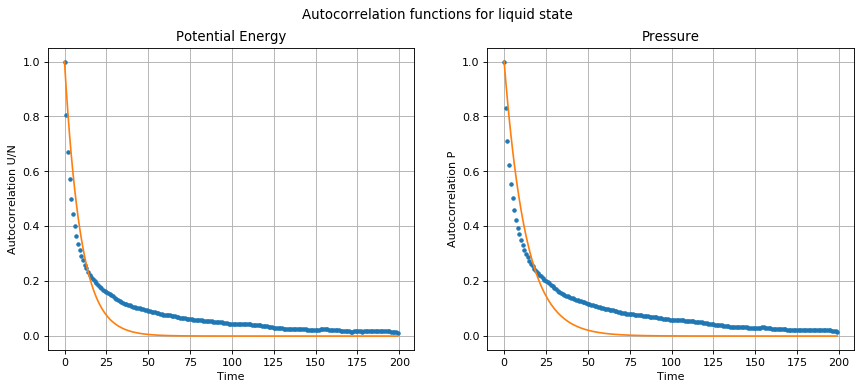

Estimated correlation time for potential energy = 9.711442267320562
Estimated correlation time for pressure = 12.994171753228022


In [10]:
## Autocorrelation for liquid
liquid_pot=np.loadtxt("instantaneous_values/liquid_epot.dat")
liquid_pres=np.loadtxt("instantaneous_values/liquid_pres.dat")

#Calculate autocorrelation, it is sufficient less than the full vector

times=np.asarray(range(200))

ac_pot=np.zeros(len(times))
ac_pres=np.zeros(len(times))

for j in range(len(times)):
    ac_pot[j]=chi(liquid_pot,j)
    ac_pres[j]=chi(liquid_pres,j)
    

# Try to fit the exponential decrease

def exp_fit(x,b):
    return (np.exp(-x))**b
    
params_pot, cov_pot= optimize.curve_fit(exp_fit, times, ac_pot)  
params_pres, cov_pres= optimize.curve_fit(exp_fit, times, ac_pres)

# Now plot the data

fig,(ax1,ax2)= plt.subplots(1,2,figsize=(13,5), dpi=80)

fig.suptitle("Autocorrelation functions for liquid state")
ax1.plot(times,ac_pot,marker=".",linestyle="none")
ax1.plot(times,exp_fit(times,params_pot[0]))
ax1.set_title('Potential Energy')
ax1.set(xlabel='Time', ylabel='Autocorrelation U/N')
ax1.grid(True)

ax2.plot(times,ac_pres,marker=".",linestyle="none")
ax2.plot(times,exp_fit(times,params_pres[0]))
ax2.set_title('Pressure')
ax2.set(xlabel='Time', ylabel='Autocorrelation P')
ax2.grid(True)

plt.show()
plt.close()

print("Estimated correlation time for potential energy = "+str(1/params_pot[0]))
print("Estimated correlation time for pressure = "+str(1/params_pres[0]))

Here the curves does not show a clear exponential behaviour, it decreases slower than expected but after $\sim 100$  steps the autocorrelation is almost $0$ nonetheless

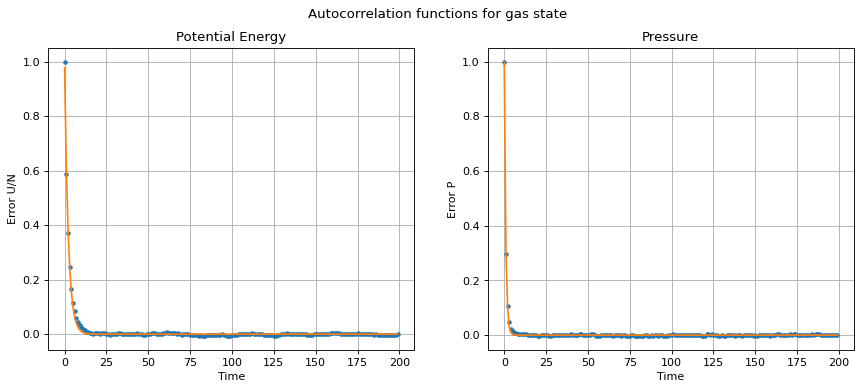

Estimated correlation time for potential energy = 2.1867755814251986
Estimated correlation time for pressure = 0.8590138977208921


In [30]:
## Autocorrelation for gas
gas_pot=np.loadtxt("instantaneous_values/gas_epot.dat")
gas_pres=np.loadtxt("instantaneous_values/gas_pres.dat")

#Calculate autocorrelation, it is sufficient less than the full vector

times=np.asarray(range(200))

ac_pot=np.zeros(len(times))
ac_pres=np.zeros(len(times))

for j in range(len(times)):
    ac_pot[j]=chi(gas_pot,j)
    ac_pres[j]=chi(gas_pres,j)
    

# Try to fit the exponential decrease

def exp_fit(x,a,b):
    return a*(np.exp(-x))**b
    
params_pot, cov_pot= optimize.curve_fit(exp_fit, times, ac_pot)  
params_pres, cov_pres= optimize.curve_fit(exp_fit, times, ac_pres)

# Now plot the data

fig,(ax1,ax2)= plt.subplots(1,2,figsize=(13,5), dpi=80)

fig.suptitle("Autocorrelation functions for gas state")
ax1.plot(times,ac_pot,marker=".",linestyle="none")
ax1.plot(times,exp_fit(times,params_pot[0],params_pot[1]))
ax1.set_title('Potential Energy')
ax1.set(xlabel='Time', ylabel='Error U/N')
ax1.grid(True)

ax2.plot(times,ac_pres,marker=".",linestyle="none")
ax2.plot(times,exp_fit(times,params_pres[0],params_pres[1]))
ax2.set_title('Pressure')
ax2.set(xlabel='Time', ylabel='Error P')
ax2.grid(True)

plt.show()
plt.close()

print("Estimated correlation time for potential energy = "+str(1/params_pot[1]))
print("Estimated correlation time for pressure = "+str(1/params_pres[1]))

The gas phase is the one with the shortest correlation time.


- **Size of the blocks**

Now that we have an estimation of the correlation time, let's see how big the blocks should be in order to fill the statistical error related to blocking average, in order to not understimate it.

In [24]:
## Now create a function to calculate the error of the blocking method

def blocking_error(v,L,N):
    ave=np.zeros(int(N))
    av2=np.zeros(int(N))
    sum_prog=0
    su2_prog=0
    err_prog=0
    
    for i in range(N):
        t_sum=0
        for j in range(L):
            k=j+i*L
            t_sum+=v[k]
            #ave[i]+=v[k]
            #av2[i]+=v[k]*v[k]
        
        ave[i]=t_sum/L
        av2[i]=(ave[i])**2
        
        sum_prog+=ave[i]
        su2_prog+=av2[i]
    
    sum_prog/=N
    su2_prog/=N
    
    err_prog=math.sqrt((su2_prog-(sum_prog)**2)/N)
    
    return err_prog

In [25]:
# Create the block size vector and the number of blocks vector
M=500000

# Because M= (2**5)*(5**6), generate L as (2**i)*(5**j) with 10<L<5000
L=[]

for i in range(6):
    for j in range(7):
        a=(2**i)*(5**j)
        if(a<=5000 and a>=10):
            L.append(a)

L=np.sort(L) #Size of each block

N=M/L # Number of blocks

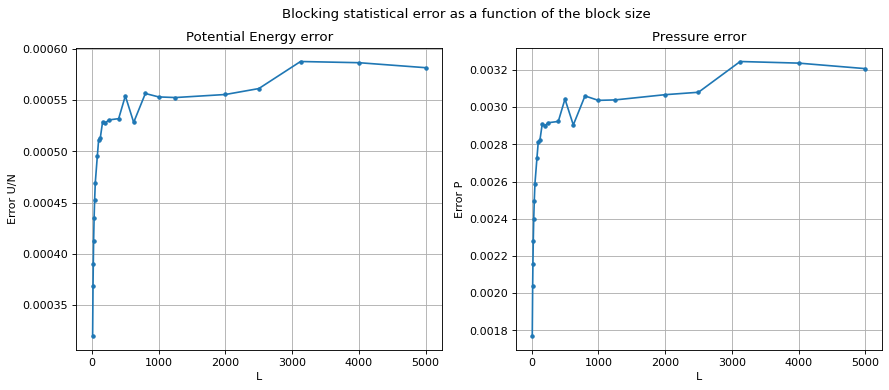

In [26]:
## Error for blocking solid phase

error_solid_pot=[]
error_solid_pres=[]

for l in range(len(L)):
    error_solid_pot.append(blocking_error(solid_pot,int(L[l]),int(N[l])))
    error_solid_pres.append(blocking_error(solid_pres,int(L[l]),int(N[l])))
    
## And now plot the data

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5),dpi=80)

fig.suptitle("Blocking statistical error as a function of the block size for solid")
ax1.plot(L,error_solid_pot,marker=".")
ax1.set_title('Potential Energy error')
ax1.set(xlabel='L', ylabel='Error U/N')
ax1.grid(True)

ax2.plot(L,error_solid_pres,marker=".")
ax2.set_title('Pressure error')
ax2.set(xlabel='L', ylabel='Error P')
ax2.grid(True)

plt.show()
plt.close()


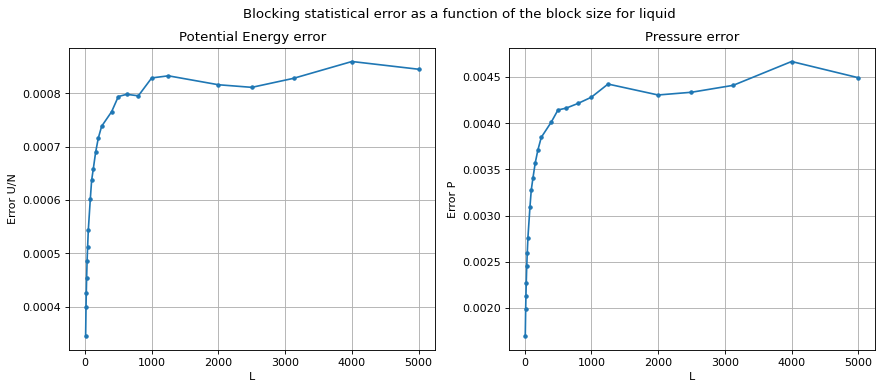

In [28]:
## Error for blocking liquid phase

error_liquid_pot=[]
error_liquid_pres=[]

for l in range(len(L)):
    error_liquid_pot.append(blocking_error(liquid_pot,int(L[l]),int(N[l])))
    error_liquid_pres.append(blocking_error(liquid_pres,int(L[l]),int(N[l])))
    
## And now plot the data

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5),dpi=80)

fig.suptitle("Blocking statistical error as a function of the block size for liquid")
ax1.plot(L,error_liquid_pot,marker=".")
ax1.set_title('Potential Energy error')
ax1.set(xlabel='L', ylabel='Error U/N')
ax1.grid(True)

ax2.plot(L,error_liquid_pres,marker=".")
ax2.set_title('Pressure error')
ax2.set(xlabel='L', ylabel='Error P')
ax2.grid(True)

plt.show()
plt.close()

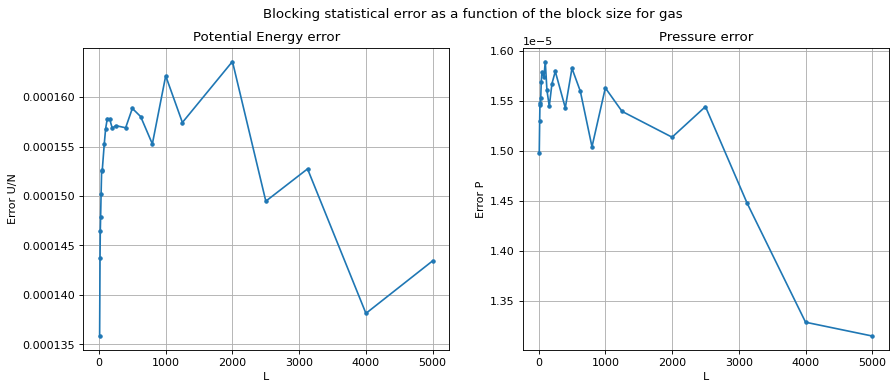

In [31]:
## Error for blocking gas phase

error_gas_pot=[]
error_gas_pres=[]

for l in range(len(L)):
    error_gas_pot.append(blocking_error(gas_pot,int(L[l]),int(N[l])))
    error_gas_pres.append(blocking_error(gas_pres,int(L[l]),int(N[l])))
    
## And now plot the data

fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5),dpi=80)

fig.suptitle("Blocking statistical error as a function of the block size for gas")
ax1.plot(L,error_gas_pot,marker=".")
ax1.set_title('Potential Energy error')
ax1.set(xlabel='L', ylabel='Error U/N')
ax1.grid(True)

ax2.plot(L,error_gas_pres,marker=".")
ax2.set_title('Pressure error')
ax2.set(xlabel='L', ylabel='Error P')
ax2.grid(True)

plt.show()
plt.close()

After increasing the block size sufficiently we see that the error associated to the block does not increase anymore. This is the optimal size to choose for a block.

Therefore is reasonable to consider a block size of approximately $3000$ steps for solid and liquid phase, while $1000$ for gas phase.

### EXERCISE 07.2

Now we have to include the calculation of the radial distribution function. This can be done by modifying th function <code>Measure()</code> and <code>Averages()</code> of the code given.

In particular, the code added for calculating the g(r) as an histogram  in <code>Measure()</code> is

```c++
for(int k=igofr;k<n_props;k++){
      if(dr>=k*bin_size && dr< (k+1)*bin_size){
        walker[k]+=2;
      }
}
```
While in <code>Averages()</code> we implemented a way to print the result for every block and a method to print the final results with errors. Below an example of calculation of the final g(r) can be found.

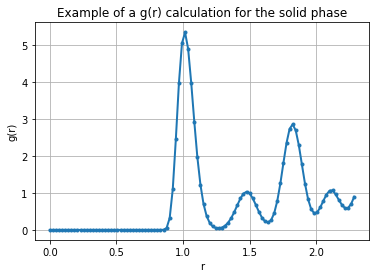

In [33]:
example_g=np.loadtxt("results/example_g.dat")

x=[]
y=[]
y_err=[]

for i in range(len(example_g)):
    x.append(example_g[i][0])
    y.append(example_g[i][1])
    y_err.append(example_g[i][2])
    
plt.errorbar(x,y,yerr=y_err,marker='.',lw=2,ecolor='gray')
plt.xlabel('r')
plt.ylabel('g(r)')
plt.grid(True)
plt.title('Example of a g(r) calculation for the solid phase')
plt.show()
plt.close()

### EXERCISE 07.3

Now the code has to be implemented also for the molecular dynamic simulation code.

In this case, this has been done by creating a **new**, modified version of <code>MolecularDynamic_NVE</code> that works just like the Monte Carlo code but with the <code>Move()</code> function is now the Verlet algorithm. Also the initialization has been rewritten in order to allow restarts and equilibrations. 

In such way I didn't need to adapt the calculation of the $g(r)$ in a different structured code.

### EXERCISE 07.4

Here we use the Monte Carlo code we have created to simulate the Lennard-Jones model of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$) 

First we show the calculation of pressure $P$ and potential energy per particle $U/N$

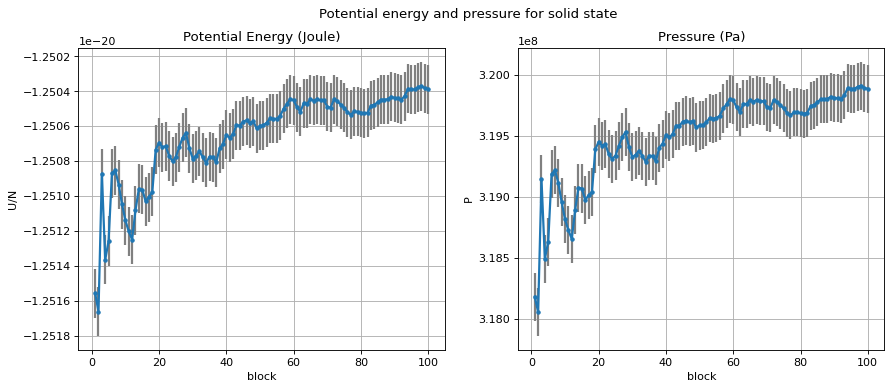

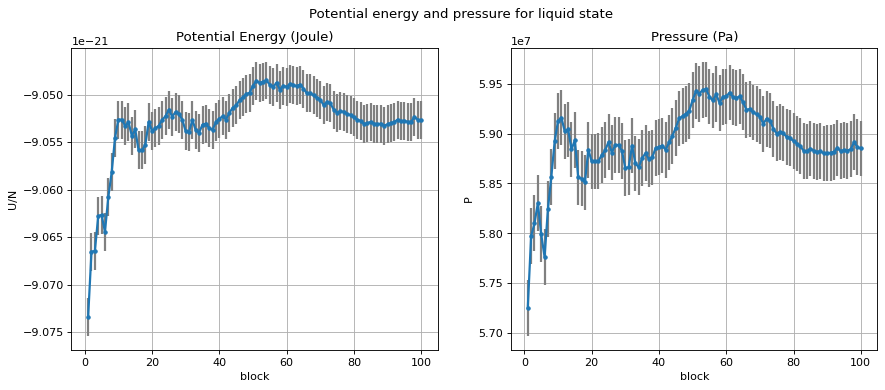

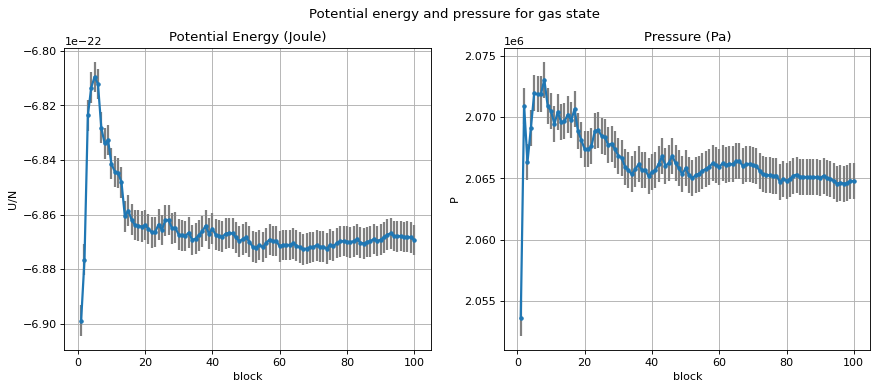

In [2]:
#Useful constants
K=1.3806*10**(-23)   #Boltzmann constant

#Argon
sigma=0.34*10**(-9)
r=120
mass=39.948*1.66054*10**(-27)
eps=r*K


#Now import data

state=['solid','liquid','gas']

for j in state:
    pot_data=np.loadtxt("results/MC_"+j+"/output.epot.0")
    pres_data=np.loadtxt("results/MC_"+j+"/output.pres.0")
    
    x=np.zeros(len(pot_data))
    y1=np.zeros(len(pot_data))
    y1_err=np.zeros(len(pot_data))
    
    y2=np.zeros(len(pot_data))
    y2_err=np.zeros(len(pot_data))
    
    for i in range(len(pot_data)):
        x[i]=pot_data[i][0]
        y1[i]=pot_data[i][2]
        y1_err=pot_data[i][3]
        
        y2[i]=pres_data[i][2]
        y2_err=pres_data[i][3]
        
    ##Now plot
    fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5),dpi=80)

    fig.suptitle("Potential energy and pressure for "+j+" state")
    ax1.errorbar(x,y1*eps,yerr=y1_err*eps,marker=".",lw=2,ecolor='gray')
    ax1.set_title('Potential Energy (Joule)')
    ax1.set(xlabel='block', ylabel='U/N')
    ax1.grid(True)
    
    ax2.errorbar(x,y2*eps/(sigma**3),yerr=y2_err*eps/(sigma**3),marker=".",lw=2,ecolor='gray')
    ax2.set_title('Pressure (Pa)')
    ax2.set(xlabel='block', ylabel='P')
    ax2.grid(True)

    plt.show()
    plt.close()

Then we compare the radial distribution functions obtained via the MC code with those obtained via the MD code.

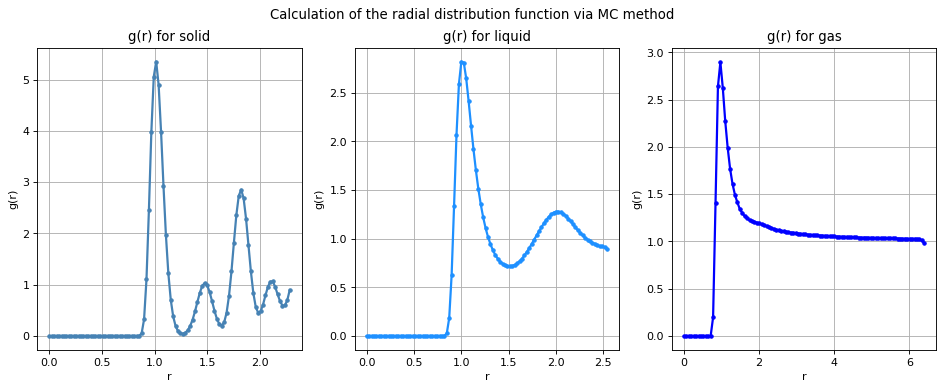

In [5]:
s_mc_g=np.loadtxt("results/MC_solid/output.gave.0")
l_mc_g=np.loadtxt("results/MC_liquid/output.gave.0")
g_mc_g=np.loadtxt("results/MC_gas/output.gave.0")

xs=[]
ys=[]
ys_err=[]

xl=[]
yl=[]
yl_err=[]

xg=[]
yg=[]
yg_err=[]

for i in range(len(s_mc_g)):
    xs.append(s_mc_g[i][0])
    ys.append(s_mc_g[i][1])
    ys_err.append(s_mc_g[i][2])
    
    xl.append(l_mc_g[i][0])
    yl.append(l_mc_g[i][1])
    yl_err.append(l_mc_g[i][2])
    
    xg.append(g_mc_g[i][0])
    yg.append(g_mc_g[i][1])
    yg_err.append(g_mc_g[i][2])
    
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(14.5,5),dpi=80)

fig.suptitle("Calculation of the radial distribution function via MC method")

ax1.errorbar(xs,ys,yerr=ys_err,marker='.',color="steelblue",lw=2,ecolor='gray')
ax1.set_title('g(r) for solid')
ax1.set(xlabel='r', ylabel='g(r)')
ax1.grid(True)

ax2.errorbar(xl,yl,yerr=yl_err,marker='.',lw=2,ecolor='gray',color='dodgerblue')
ax2.set_title('g(r) for liquid')
ax2.set(xlabel='r', ylabel='g(r)')
ax2.grid(True)

ax3.errorbar(xg,yg,yerr=yg_err,marker='.',color='blue',lw=2,ecolor='gray')
ax3.set_title('g(r) for gas')
ax3.set(xlabel='r', ylabel='g(r)')
ax3.grid(True)


plt.show()
plt.close()

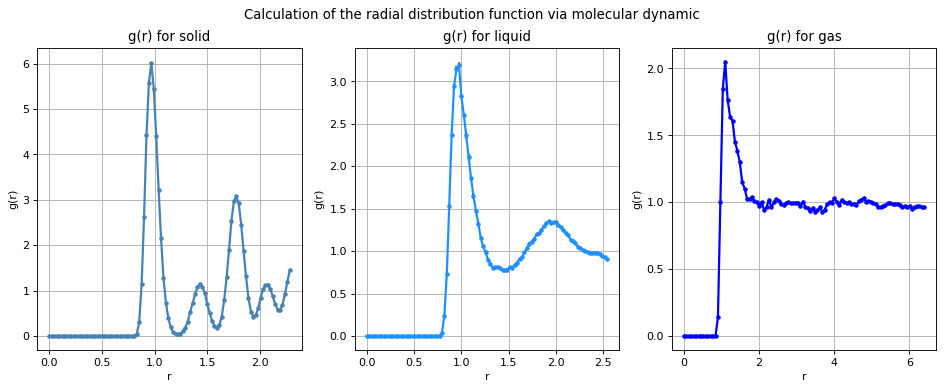

In [6]:
s_md_g=np.loadtxt("results/MD_solid/output.gave.0")
l_md_g=np.loadtxt("results/MD_liquid/output.gave.0")
g_md_g=np.loadtxt("results/MD_gas/output.gave.0")

xs=[]
ys=[]
ys_err=[]

xl=[]
yl=[]
yl_err=[]

xg=[]
yg=[]
yg_err=[]

for i in range(len(s_md_g)):
    xs.append(s_md_g[i][0])
    ys.append(s_md_g[i][1])
    ys_err.append(s_md_g[i][2])
    
    xl.append(l_md_g[i][0])
    yl.append(l_md_g[i][1])
    yl_err.append(l_md_g[i][2])
    
    xg.append(g_md_g[i][0])
    yg.append(g_md_g[i][1])
    yg_err.append(g_md_g[i][2])
    
fig, (ax1,ax2,ax3)=plt.subplots(1,3,figsize=(14.5,5),dpi=80)

fig.suptitle("Calculation of the radial distribution function via molecular dynamic")

ax1.errorbar(xs,ys,yerr=ys_err,marker='.',color="steelblue",lw=2,ecolor='gray')
ax1.set_title('g(r) for solid')
ax1.set(xlabel='r', ylabel='g(r)')
ax1.grid(True)

ax2.errorbar(xl,yl,yerr=yl_err,marker='.',lw=2,ecolor='gray',color='dodgerblue')
ax2.set_title('g(r) for liquid')
ax2.set(xlabel='r', ylabel='g(r)')
ax2.grid(True)

ax3.errorbar(xg,yg,yerr=yg_err,marker='.',color='blue',lw=2,ecolor='gray')
ax3.set_title('g(r) for gas')
ax3.set(xlabel='r', ylabel='g(r)')
ax3.grid(True)


plt.show()
plt.close()

The two type of algorithms show similar results in calculating the radial distribution function. It is rather surprising that two algorithms made to simulate two different type of ensamble, microcanonical and canonical, give the same results. 

This is because in the thermodynamic limit the two ensemble coincide.